<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/main/Shishkin%20Sergey/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5_%D0%98%D0%BD%D0%B3%D0%B5%D0%B9%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Хочу начать со статистики, мною было проведено более 500 экспериментов тестирования примерно 12 разных методов прогнозирования, от различных разновидностей временных рядов до разных способов регрессий и гибридных моделей. Эксперименты проводились с разными условиями, целями, задачами для понимания особенностей работы методов и выбора оптимального метода для решения поставленной задачи.

**Результаты:**

1.	Основополагающей считаю, таблицу зависимостей благодаря которой осуществляется поиск параметров, которые могут влиять на целевую переменную, но не зависят от нее!
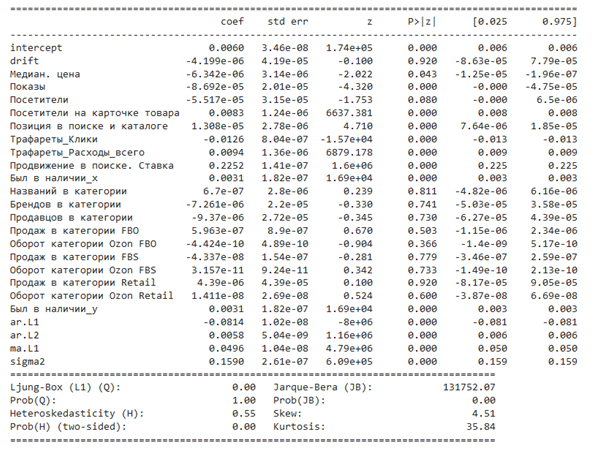

2.	Предсказание (как предлагал Заказчик) на большом количестве параметров возможно, но точность низкая из-за помех от данных не влияющих на целевую переменную. Убрав лишние параметры (не влияющие на целевую переменную) точность предсказания модели повысилась до 85%.
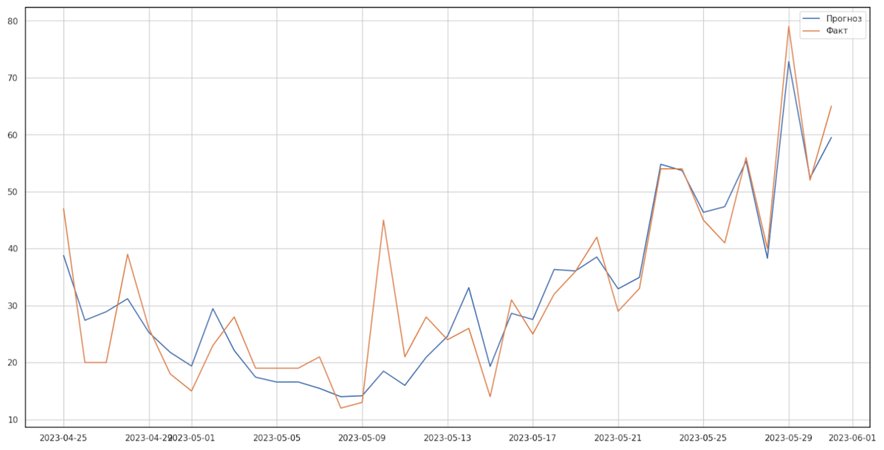

3.	Самый главный критерий предсказания целевого значения - это наличие параметров влияющих на целевую переменную. В одном из экспериментов была получена точность 96% предсказания «Заказано товаров» по единственному параметру «Уникальные посетители с просмотром карточки товара». Это подтверждает мою гипотезу что остальные данные из 40 колонок практически не влияют на целевой показатель.

4.	Точность предсказания зависит от однотипности прогнозируемых товаров и временного шага предсказания (день, неделя, месяц)

Предсказание на всех товарах продавца дает точность ниже, чем на отдельной группе товаров, самая высокая точность предсказания достигается отдельно по каждому товару. Но каждый раз модель делается под каждый вариант номенклатуры.(Поэтому по всей номенклатуре – одна модель, по 5 группам – 5 моделей, по 1000 единиц товаров – 1000 моделей)

Прогноз с шагом 1 месяц самый не точный, чем  меньше шаг тем выше точность, а дневной прогноз на 15 дней показывал отклонение на 1,3% от реального суммарного за этот период.

RMSE: 4.781617902341809

MAPE: 12.398118968750474

MAPE_sum: 1.3078567020360665

Факт за период: 518

Прогноз за период: 524.7746977165468

  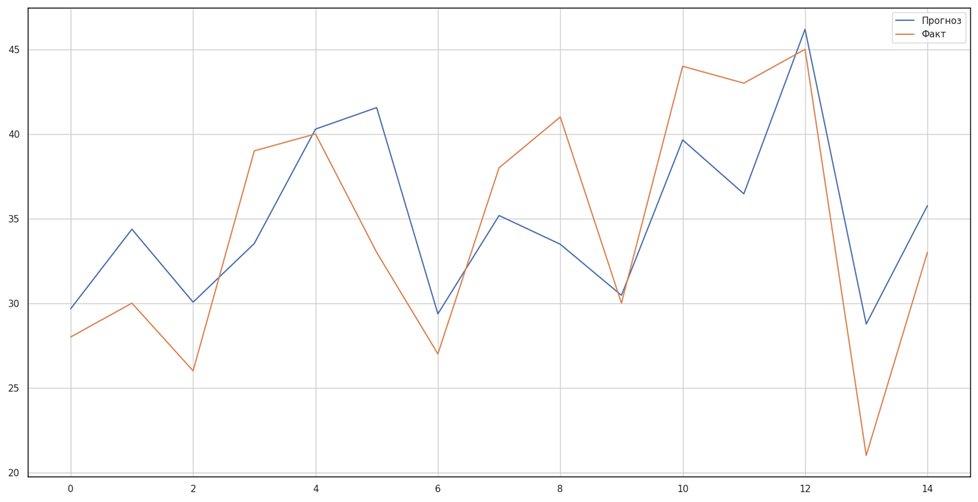

5.	Главная проблема для обучения моделей предсказания это нулевые значения(пустые ячейки), особенно целевого показателя. Они занимают до 96% всех данных, и исключать эти данные из обучения нельзя, это исказит картину поведения покупателя. В моих экспериментах были протестированы следующие способы борьбы с данной проблемой: группировка (по дням, по окну различного размера, по событию); повышение шкалы отсчета, когда за ноль принимается другая величина и все данные сдвигаются относительно этой величины; «размазывание» целевого показателя на ближайшие нулевые значения. Выделить лучший метод борьбы с нулями не получилось, в разных условиях разные методы показывали лучший результат. При обучении модели на продажах одного Артикула приходилось делать симбиоз из нескольких методов.


**Не решенные проблемы:**

Причина всех не решенных проблем или отсутствие данных или не достаточное их количество.

Из предоставленных данных только по поведению Посетителей удалось с  высокой точностью предсказывать количество Заказов.
Прямого влияния цены, позиции в поиске и заполненности карточки (контент-рейтинг) на Заказы модель не нашла.
Чтобы выявить зависимость этих показателей нужны данные по всей категории аналогичные данным из кабинета продавца. Т.е. для определения влияния цены нужно сравнивать цены и продажи у всех продвцов в категории; для определения влияния позиции в поиске нужно сравнивать позицию поиска у всех продвцов в категории и с учетом количества Посетителей всей категории и показов Посетителям карточек всех продавцов категории; для определения влияния заполненности карточки нужно сравнивать заполненность у всех продвцов в категории с учетом их продаж.

Получив эти данные можно прогнозировать посещение и объем продаж всей категории – из этих данных, на основе позиции в поиске, получать распределение показов по продавцам категории – из показов, на основе цены, получать количество просмотров карточки – из Показов карточки, на основе цены и заполненности, получать количество Заказов.


**Итог:**

1.	На тех данных которые есть у нас мы  можем предсказывать только последний этап, из просмотров прогнозировать количество Заказов (умножив на цену получим Выручку).
2.	Прогнозировать количество Показов самостоятельно нельзя, но можно пользоваться сервисом Озона – Продвижение, где маркетплейс сам делает прогноз в зависимости от ставки, и указывает какое количество Показов сейчас и какое будет.
3.	На предоставленных данных:

    влияние цены учесть нельзя,

    заполненность карточки учесть нельзя,

    место в поиске учесть нельзя,

    сезонность учесть нельзя.

    Все эти влияния необходимо определять экспертным путем.

4.	Соответственно точность прогноза на срок более месяца не имеет смысла, слишком много изменений может произойти во внешних данных, влияние которых мы учесть не можем. Выход – переобучение модели каждый месяц.
5.	Наиболее оптимальным будет использовать АВС анализ. Выбрать группу товаров А или АВ, обучить на этих товарах модель и делать прогноз в продажах с учетом увеличения Показов. Будет получен двойной эффект, увеличение оборота и увеличение прибыли Продавца.


**P.S.**

Источники получения необходимой информации существуют и есть возможность получить не достающие данные.

1. Маркетплейс владеет всей необходимой информацией и нужно найти способ с ним договориться, чтобы получить нужную нам информацию (взаимовыгодное сотрудничество, покупка информации, обмен информацией).

2. Существуют сервисы анализа трафика сайта и общая информация по Озону есть в открытом доступе (более 300 млн. посетителей и 3 млрд. просмотренных страниц в день). Нас интересует распределение данного трафика вглубь каждой категории до карточек товаров. Если сервисы данную информацию не собирают, то можно начать сбор (самостоятельно или через эти сервисы), на ключевых страницах устанавливаются боты которые подсчитывают трафик и переходы на страницы. В данном случае у нас будет 90% необходимой информации (посетители, просмотры, цены - дают боты; позиция в поиске, контент рейтинг - дает маркетплейс), будет не хватать лишь участие в Продвижении, но его можно вычислять косвенно через увеличение показов и позицию в поиске.

**Демонстрация возможностей предсказания моделей**

Как пример решил показать решение самой сложной задачи.

По одному параметру "Уникальные посетители с просмотром карточки товара" и одному товару из новой выборки НаноДача по Артикулу nd1803, не удаляя строки с нулевыми заказами, предсказываем целевой показатель "Заказано товаров".

Что бы не избавляться от нулевых заказов и обучать модель с учетом Покупателей которые не Заказали товар, применялась гибридная группировка данных.

# Модель предсказания на одном параметре

In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.8 MB/s eta 0:00:00


In [ ]:
pip install keras-tuner==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.4.0
    Uninstalling keras-tuner-1.4.0:
      Successfully uninstalled keras-tuner-1.4.0


In [ ]:
pip show keras-tuner

Name: keras-tuner
Version: 1.3.5
Summary: A Hyperparameter Tuning Library for Keras
Home-page: https://github.com/keras-team/keras-tuner
Author: The KerasTuner authors
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: kt-legacy, packaging, requests
Required-by: autokeras


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import autokeras as ak
import math

Using TensorFlow backend


# Обучение модели

In [ ]:
#Загружаем подготовленные данные
df = pd.read_csv('/content/my_df_nd1803_2.csv')

In [ ]:
df.head()

,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Заказано товаров
0,656,28,1496,1
1,1109,41,2424,2
2,2626,118,5771,4
3,2654,120,5822,6
4,3534,169,7300,7


In [ ]:
df.drop(['Уникальные посетители, всего', 'Показы, всего'], axis=1, inplace=True)
df.head()

,Уникальные посетители с просмотром карточки товара,Заказано товаров
0,28,1
1,41,2
2,118,4
3,120,6
4,169,7


In [ ]:
# Формируем тренировочную и тестовую выборки
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"

In [ ]:
x_train = pd.read_csv(train_file_path)
y_train = x_train.pop("Заказано товаров")
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("Заказано товаров")

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=155, tuner='bayesian'
)
reg.fit(
    train_file_path,
    "Заказано товаров",
    epochs=155,
)

predicted_y = reg.predict(test_file_path)
print(reg.evaluate(test_file_path, "Заказано товаров"))

Trial 155 Complete [00h 00m 20s]
val_loss: 7398.94580078125

Best val_loss So Far: 3.9622888565063477
Total elapsed time: 00h 34m 48s
Epoch 1/155
2/2 [==============================] - 1s 9ms/step - loss: 3729.7395 - mean_squared_error: 3729.7395
Epoch 2/155
2/2 [==============================] - 0s 11ms/step - loss: 3675.8645 - mean_squared_error: 3675.8645
Epoch 3/155
2/2 [==============================] - 0s 9ms/step - loss: 3608.1650 - mean_squared_error: 3608.1650
Epoch 4/155
2/2 [==============================] - 0s 10ms/step - loss: 3540.5347 - mean_squared_error: 3540.5347
Epoch 5/155
2/2 [==============================] - 0s 7ms/step - loss: 3507.1287 - mean_squared_error: 3507.1287
Epoch 6/155
2/2 [==============================] - 0s 7ms/step - loss: 3487.2090 - mean_squared_error: 3487.2090
Epoch 7/155
2/2 [==============================] - 0s 12ms/step - loss: 3397.9658 - mean_squared_error: 3397.9658
Epoch 8/155
2/2 [==============================] - 0s 7ms/step - loss: 3

In [ ]:
predicted_y = reg.predict(test_file_path)

1/1 [==============================] - 0s 5ms/step


In [ ]:
mape = np.mean(np.abs((y_test.values - predicted_y) / y_test.values)) * 100
rmse = np.sqrt(np.mean((y_test.values - predicted_y)**2))
mape_sum = np.abs((y_test.values.sum() - predicted_y.sum()) / y_test.values.sum()) * 100
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAPE_sum:", mape_sum)

RMSE: 56.69289206448261
MAPE: 48.71607456032981
MAPE_sum: 48.47911005434782


In [ ]:
# Дообучаем полученную модель
model = reg.export_model()
model.fit(x_train, y_train, epochs=1555)

Epoch 1/1555
2/2 [==============================] - 1s 9ms/step - loss: 373.9780 - mean_squared_error: 373.9780
Epoch 2/1555
2/2 [==============================] - 0s 8ms/step - loss: 438.1476 - mean_squared_error: 438.1476
Epoch 3/1555
2/2 [==============================] - 0s 11ms/step - loss: 225.5752 - mean_squared_error: 225.5752
Epoch 4/1555
2/2 [==============================] - 0s 7ms/step - loss: 244.8349 - mean_squared_error: 244.8349
Epoch 5/1555
2/2 [==============================] - 0s 7ms/step - loss: 251.8677 - mean_squared_error: 251.8677
Epoch 6/1555
2/2 [==============================] - 0s 7ms/step - loss: 188.8526 - mean_squared_error: 188.8526
Epoch 7/1555
2/2 [==============================] - 0s 7ms/step - loss: 215.6722 - mean_squared_error: 215.6722
Epoch 8/1555
2/2 [==============================] - 0s 7ms/step - loss: 155.6753 - mean_squared_error: 155.6753
Epoch 9/1555
2/2 [==============================] - 0s 8ms/step - loss: 179.2913 - mean_squared_error: 

In [ ]:
predicted_y1 = model.predict(x_test)

1/1 [==============================] - 0s 292ms/step


In [ ]:
mape = np.mean(np.abs((y_test.values - predicted_y1) / y_test.values)) * 100
rmse = np.sqrt(np.mean((y_test.values - predicted_y1)**2))
mape_sum = np.abs((y_test.values.sum() - predicted_y1.sum()) / y_test.values.sum()) * 100
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAPE_sum:", mape_sum)

RMSE: 9.975961718486932
MAPE: 7.04150863385127
MAPE_sum: 5.872970802196558


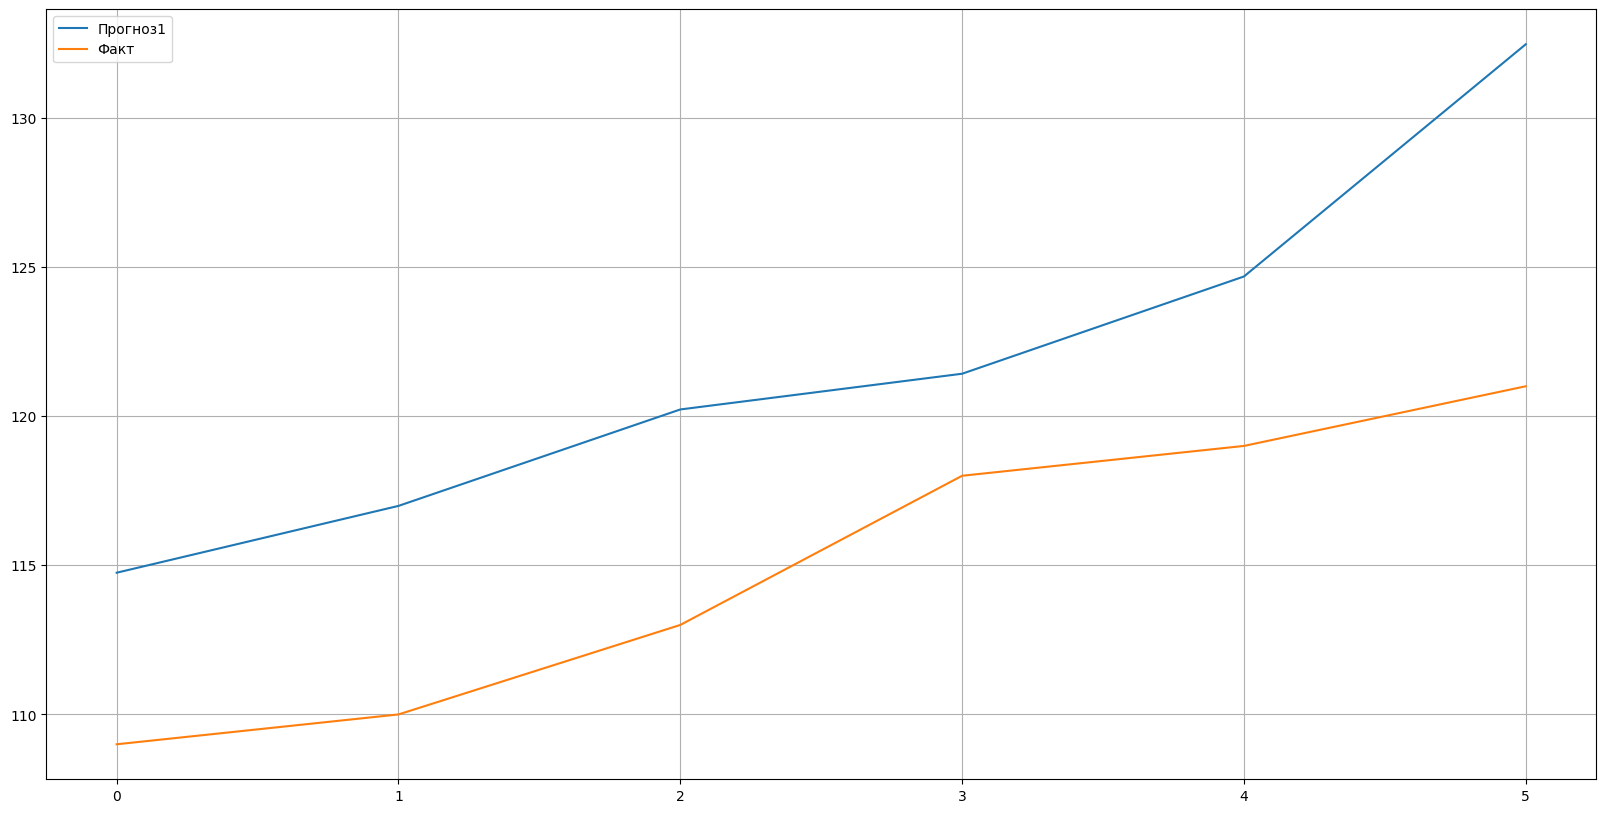

In [ ]:
#График на предсказанном отрезке
plt.figure(figsize=(20, 10))
#plt.plot(np.arange(len(predicted_y)), predicted_y, label='Прогноз0')
plt.plot(np.arange(len(predicted_y1)), predicted_y1, label='Прогноз1')
plt.plot(np.arange(len(y_test)), y_test.values, label='Факт')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Сохраняем модель для дальнейшего использования
model.save('/content/gdrive/MyDrive/Модели Керас/All_baza/df_nd1803_Zak_UpKT_7%.keras')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 1)                0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 256)               512       
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     